In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#import tensorflow.keras as keras
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,MaxPool2D,Conv2D


In [4]:
train_df = pd.read_csv("./dataset/sign_mnist_train.csv")
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
test_df = pd.read_csv("./dataset/sign_mnist_test.csv")
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [6]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [9]:
train_label = train_df["label"]
test_label = test_df["label"]

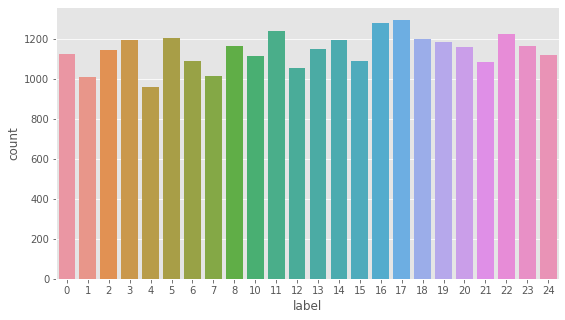

In [10]:
plt.style.use("ggplot")
plt.figure(figsize =(9,5))
sns.countplot(x= train_df['label'],data = train_df)
plt.show()

In [11]:
train_df.drop("label",axis=1,inplace=True)
train_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [12]:
test_df.drop("label",axis=1,inplace=True)
test_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [18]:
train_df = train_df.values.reshape(-1,28,28,1)
test_df = test_df.values.reshape(-1,28,28,1)


In [21]:
x_train = train_df

In [35]:
x_test = test_df

In [22]:
from sklearn.preprocessing import LabelBinarizer


In [23]:
lb = LabelBinarizer()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

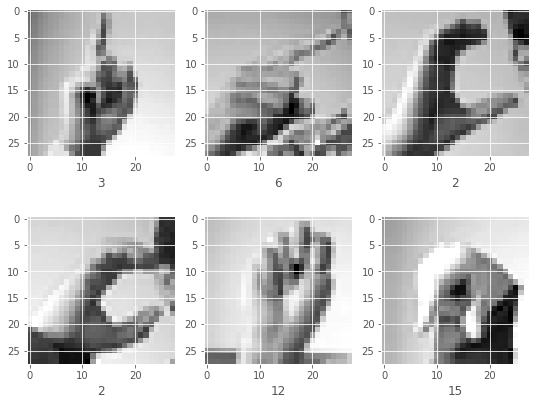

In [61]:
plt.figure(figsize=(9,7))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(np.argmax(y_train[i]))

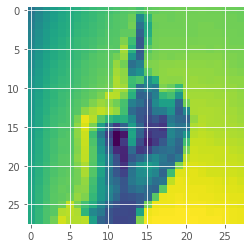

In [25]:
plt.imshow(x_train[0])

In [27]:
train_datagen = ImageDataGenerator(rescale=(1./255),rotation_range = 30,
                                  width_shift_range = 0.2,height_shift_range =0.2,
                                  shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=(1./255))

In [28]:
from tensorflow.keras import Sequential
model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'same',input_shape=(28,28,1),activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128,(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(24,activation="softmax"))

In [29]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [30]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping


In [36]:
history = model.fit_generator(generator = train_datagen.flow(x_train,y_train,batch_size=32),
                              validation_data = val_datagen.flow(x_test,y_test),epochs=15,verbose=1)

C:\Users\Ruby\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
Epoch 1/15
858/858 [==============================] - 92s 103ms/step - loss: 2.8496 - accuracy: 0.1281 - val_loss: 1.0852 - val_accuracy: 0.6118
Epoch 2/15
858/858 [==============================] - 92s 108ms/step - loss: 1.2428 - accuracy: 0.5829 - val_loss: 0.4248 - val_accuracy: 0.8483
Epoch 3/15
858/858 [==============================] - 168s 195ms/step - loss: 0.7385 - accuracy: 0.7482 - val_loss: 0.3181 - val_accuracy: 0.8864
Epoch 4/15
858/858 [==============================] - 162s 188ms/step - loss: 0.5155 - accuracy: 0.8269 - val_loss: 0.2600 - val_accuracy: 0.9101
Epoch 5/15
858/858 [==============================] - 157s 183ms/step - loss: 0.4062 - accuracy: 0.8589 - val

In [33]:
checkpoint = ModelCheckpoint('sign_lang.h5',monitor ='val_acc',verbose=1,save_best_only=True,mode='max')
earlystop = EarlyStopping(monitor = 'val_acc',verbose=1,mode='max')

In [37]:
import warnings
warnings.filterwarnings("ignore")
loss,acc = model.evaluate_generator(val_datagen.flow(x_test,y_test))
print(f"Accuracy: {acc*100}")
print(f"Loss: {loss}")


Accuracy: 99.24707412719727
Loss: 0.02767372503876686


In [38]:
x_test = x_test/255.
y_pred = model.predict_classes(x_test)

In [108]:
y_pred

array([6, 5, 9, ..., 2, 4, 2], dtype=int64)

In [39]:
y_te = np.argmax(y_test,axis=1)
y_te

array([6, 5, 9, ..., 2, 4, 2], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_te,y_pred)

0.9924707194645845

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_te,y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99       331
          1       1.00      0.99      1.00       432
          2       1.00      1.00      1.00       310
          3       1.00      1.00      1.00       245
          4       1.00      1.00      1.00       498
          5       0.99      1.00      1.00       247
          6       1.00      0.97      0.98       348
          7       1.00      0.99      0.99       436
          8       1.00      1.00      1.00       288
          9       1.00      1.00      1.00       331
         10       1.00      1.00      1.00       209
         11       1.00      0.97      0.99       394
         12       1.00      0.99      1.00       291
         13       1.00      1.00      1.00       246
         14       1.00      1.00      1.00       347
         15       1.00      1.00      1.00       164
         16       0.95      1.00      0.97       144
         17       0.99      1.00      0.99   

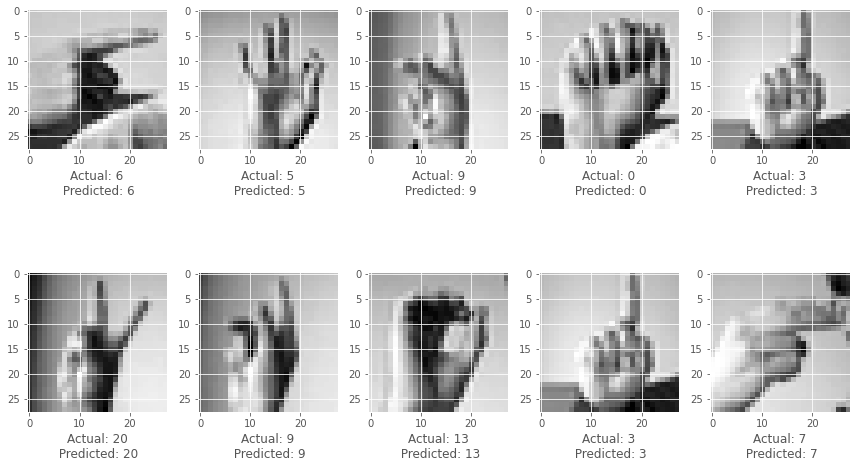

In [59]:
plt.figure(figsize=(12,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.xlabel(f"Actual: {y_te[i]}\n Predicted: {y_pred[i]}")
    
plt.tight_layout()
plt.show()

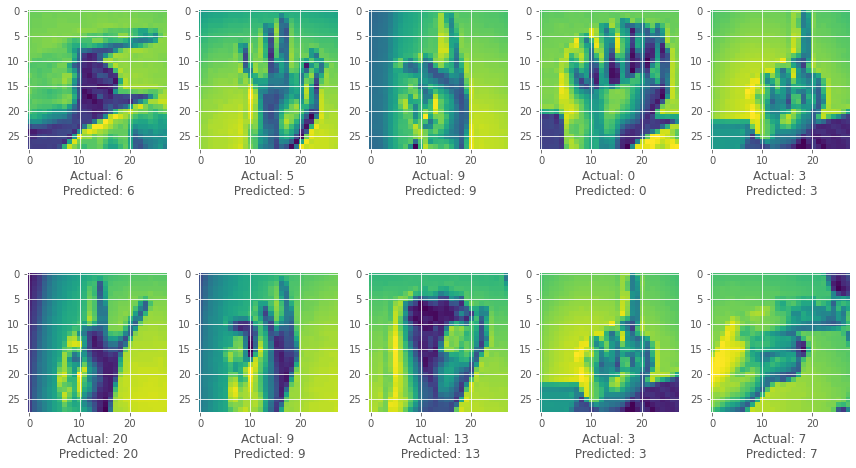

In [58]:
plt.figure(figsize=(12,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    plt.xlabel(f"Actual: {y_te[i]}\n Predicted: {y_pred[i]}")
plt.tight_layout()
plt.show()

In [43]:
model.save("model.h5")

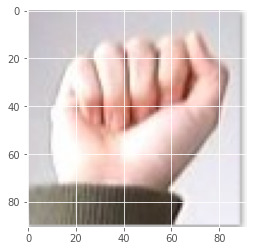

In [159]:
image_ = plt.imread('./ges.png')
plt.imshow(image_)

In [1]:
def your_image(img_path):
    from PIL import Image, ImageOps
    from tensorflow.keras.preprocessing import image

    img = image.load_img(img_path, target_size=(28, 28, 1))
    img = ImageOps.grayscale(img)

    img_array = image.img_to_array(img)
    img_array = img_array.reshape(-1,28,28,1)
    img_array = img_array/255.

    return img_array



In [4]:
import tensorflow
model = tensorflow.keras.models.load_model('./model.h5')

In [5]:
model.predict_classes(your_image('./ges.png'))

C:\Users\Ruby\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0], dtype=int64)